# DBScan (Density-Based Spatial Clustering of Applications with Noise)


**Algorithm:**

    1.Identify core points.
    2.Expand clusters by merging density-connected points.
    3.Assign border points to clusters.

**Pros:**

- Effectively captures clusters of varying densities without assuming a specific shape.
- Robust to noise and can identify these points as outliers without assigning them to any cluster.
- Can identify arbitrarily shaped clusters, making it suitable for datasets with complex cluster structures.
- Preferred for large datasets because it is efficient, and does not require specifying the number of clusters beforehand

**Cons:**

- The choice of parameters (eps and min_samples) greatly affects the performance of DBSCAN.
- If these parameters are not tuned properly, DBSCAN may either over-cluster (too sensitive to noise) or under-cluster (miss important patterns).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import DBSCAN

### Dataset
We can create a dataset with clusters of varying densities and shapes, along with some outliers.

- We first generate two synthetic datasets using make_moons and make_blobs functions from scikit-learn.
- We combine the datasets to create a more complex dataset with clusters of varying densities and shapes.

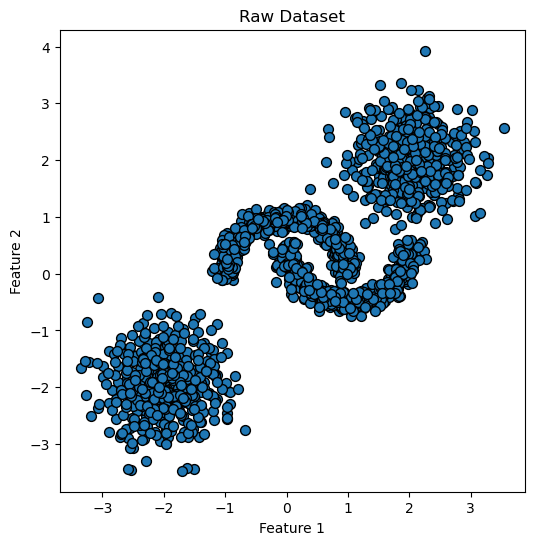

In [2]:
# Generate synthetic dataset
X_moons, _ = make_moons(n_samples=1000, noise=0.1, random_state=42)
X_blobs, _ = make_blobs(n_samples=1000, centers=[[2, 2], [-2, -2]], cluster_std=0.5, random_state=42)

# Combine datasets
X = np.vstack((X_moons, X_blobs))

# Plot raw dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], marker='o', edgecolor='k', s=50)
plt.title('Raw Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### DBSCAN
- We perform DBSCAN clustering using scikit-learn's DBSCAN class with eps (maximum distance between two samples for one to be considered as in the neighborhood of the other) and min_samples (the number of samples in a neighborhood for a point to be considered as a core point) parameters.

In [3]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_pred = dbscan.fit_predict(X)

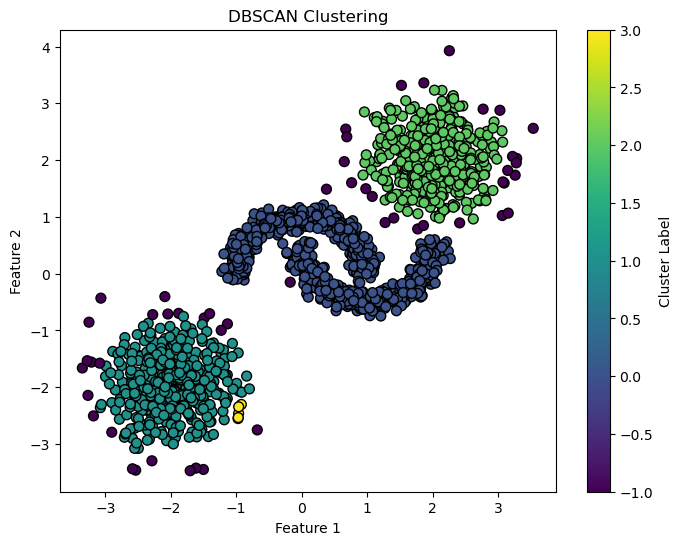

In [4]:
# Plot clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()